# Multilevel Model of Program Outcomes

In [ ]:
# Work through tutorial first: https://www.pythonfordatascience.org/mixed-effects-regression-python/

In [11]:
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats


df = pd.read_csv("http://www-personal.umich.edu/~bwest/rat_pup.dat", sep = "\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pup_id     322 non-null    int64  
 1   weight     322 non-null    float64
 2   sex        322 non-null    object 
 3   litter     322 non-null    int64  
 4   litsize    322 non-null    int64  
 5   treatment  322 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 15.2+ KB


In [12]:
rp.codebook(df)

Variable: pup_id    Data Type: int64 

 Number of Obs.: 322 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 322 

 Range: [1, 322] 
 Mean: 161.5 
 Standard Deviation: 93.1 
 Mode: 1 
 10th Percentile: 33.1 
 25th Percentile: 81.25 
 50th Percentile: 161.5 
 75th Percentile: 241.75 
 90th Percentile: 289.90000000000003 





Variable: weight    Data Type: float64 

 Number of Obs.: 322 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 173 

 Range: [3.68, 8.33] 
 Mean: 6.08 
 Standard Deviation: 0.65 
 Mode: 6.29 
 10th Percentile: 5.331 
 25th Percentile: 5.65 
 50th Percentile: 6.055 
 75th Percentile: 6.3975 
 90th Percentile: 6.9590000000000005 





Variable: sex    Data Type: object 

 Number of Obs.: 322 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 2 

 Data Values and Counts: 
 
 Values  Frequency
Female        151
  Male        171




Variable: litter    Data Type: int64 

 Number of Obs

In [13]:
rp.summary_cont(df.groupby(["treatment", "sex"])["weight"])

N    Mean      SD      SE  95% Conf.  Interval
treatment sex                                                    
Control   Female  54  6.1161  0.6851  0.0932     5.9291    6.3031
          Male    77  6.4710  0.7538  0.0859     6.3000    6.6421
High      Female  32  5.8516  0.6002  0.1061     5.6352    6.0680
          Male    33  5.9185  0.6909  0.1203     5.6735    6.1635
Low       Female  65  5.8375  0.4505  0.0559     5.7259    5.9492
          Male    61  6.0251  0.3803  0.0487     5.9277    6.1225

## Check Assumptions for MLM

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

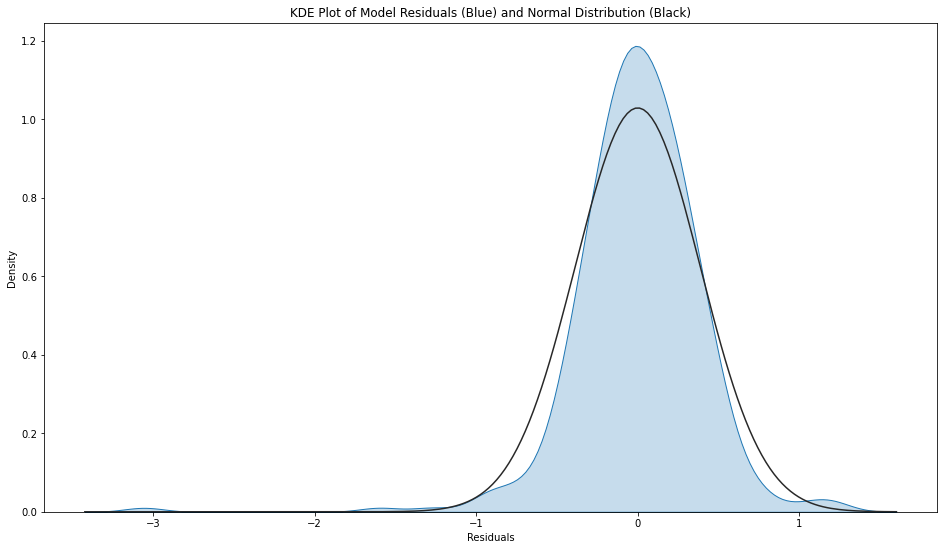

In [27]:
# Check normality of residuals with KDE plot
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

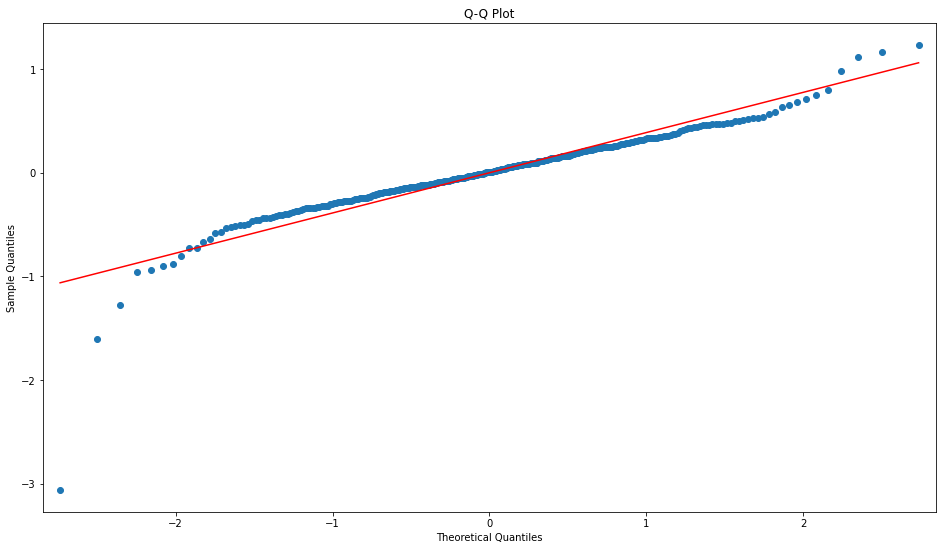

In [28]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

In [29]:
# Shapier-Wilk test of normality
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.8948183655738831
p-value 3.958863266503507e-14


## Check for Homoskedasticity of Variance

Text(0, 0.5, 'Residuals')

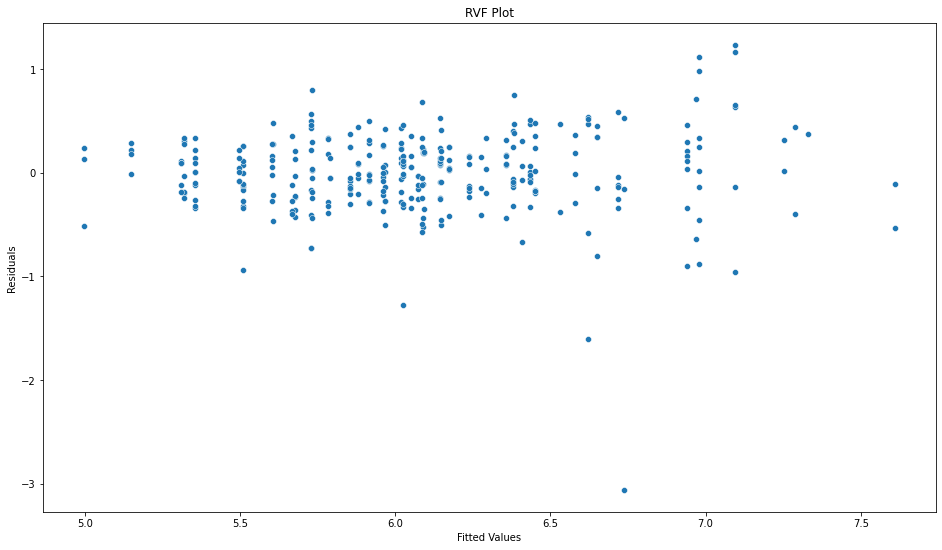

In [30]:
# RVF Plot (residuals versus fitted values)
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

Text(0.5, 0, 'Litter')

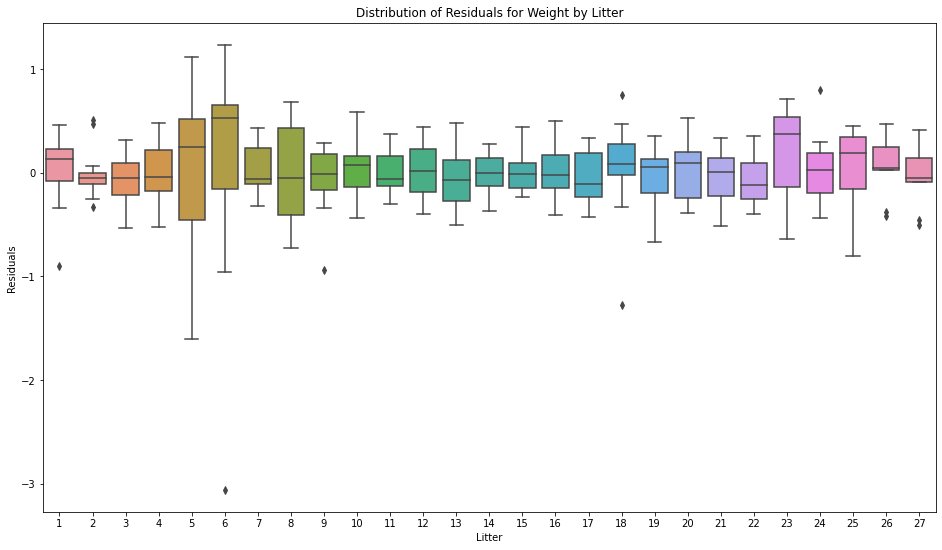

In [31]:
# boxplot of residuals
fig = plt.figure(figsize = (16, 9))

ax = sns.boxplot(x = model.model.groups, y = model.resid)

ax.set_title("Distribution of Residuals for Weight by Litter")
ax.set_ylabel("Residuals")
ax.set_xlabel("Litter")

In [32]:
# White's Lagrange Multiplier Test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model.resid, model.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 24.85952621090681
LM-Test p-value 0.0056182250407703135
F-Statistic 2.601904935064354
F-Test p-value 0.00479471523000681


## Model Statistics and Visualizations

/var/folders/xc/1yxv29253_19pst1hxznjt8m0000gn/T/ipykernel_71645/1681907886.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  boxplot.figure.show()


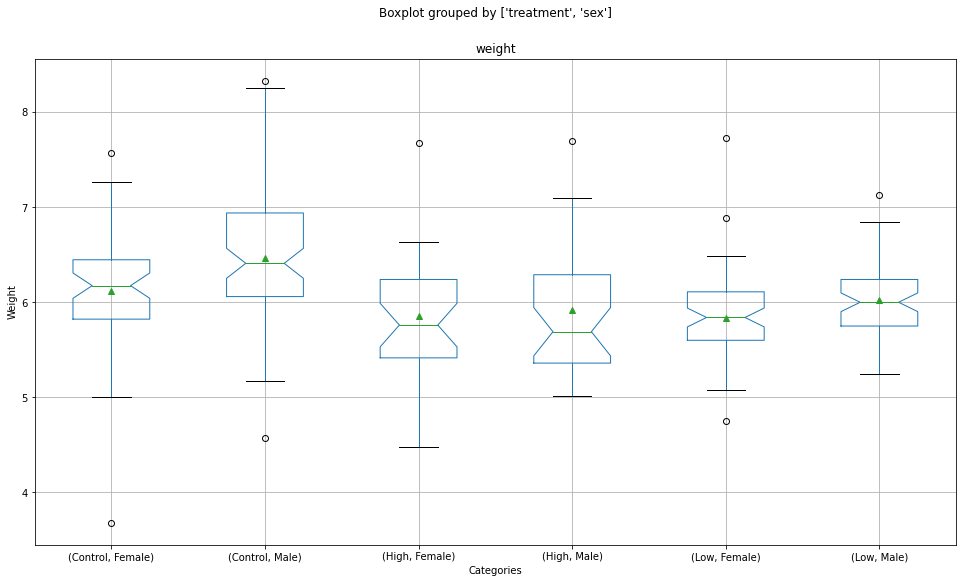

In [14]:
boxplot = df.boxplot(["weight"], by = ["treatment", "sex"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("Categories")
boxplot.set_ylabel("Weight")

boxplot.figure.show()

In [15]:
import statsmodels.formula.api as smf

model = smf.mixedlm("weight ~ litsize + C(treatment) + C(sex, Treatment('Male')) + C(treatment):C(sex, Treatment('Male'))",
                    df,
                    groups= "litter").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
===================================================================================================
Model:                            MixedLM               Dependent Variable:               weight   
No. Observations:                 322                   Method:                           REML     
No. Groups:                       27                    Scale:                            0.1635   
Min. group size:                  2                     Log-Likelihood:                   -200.5522
Max. group size:                  18                    Converged:                        Yes      
Mean group size:                  11.9                                                             
---------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------------
Intercept                                                 8.323    0.273 30.447 0.000  7.788  8.859
C(treatment)[T.High]                                     -0.906    0.192 -4.727 0.000 -1.282 -0.530
C(treatment)[T.Low]                                      -0.467    0.158 -2.952 0.003 -0.777 -0.157
C(sex, Treatment('Male'))[T.Female]                      -0.412    0.073 -5.625 0.000 -0.555 -0.268
C(treatment)[T.High]:C(sex, Treatment('Male'))[T.Female]  0.107    0.132  0.811 0.417 -0.151  0.366
C(treatment)[T.Low]:C(sex, Treatment('Male'))[T.Female]   0.084    0.106  0.794 0.427 -0.123  0.291
litsize                                                  -0.128    0.019 -6.845 0.000 -0.165 -0.092
litter Var                                                0.097    0.084                           
===================================================================================================

"""

In [17]:
# Convert variance to standard deviation by taking the square root
import math

stddev = math.sqrt(0.097) # enter value from the table
print(stddev)

0.31144823004794875


In [18]:
# Random Intercept Model w/out Interaction Term

model = smf.mixedlm("weight ~ litsize + C(treatment) + C(sex, Treatment('Male'))", df, groups= "litter").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                     MixedLM        Dependent Variable:        weight   
No. Observations:          322            Method:                    REML     
No. Groups:                27             Scale:                     0.1628   
Min. group size:           2              Log-Likelihood:            -198.4997
Max. group size:           18             Converged:                 Yes      
Mean group size:           11.9                                               
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            8.310    0.274 30.355 0.000  7.773  8.846
C(treatment)[T.High]                -0.859    0.182 -4.722 0.000 -1.215 -0.502
C(treatment)[T.Low]                 -0.429    0.150 -2.849 0.004 -0.723 -0.134
C(sex, Treatment('Male'))[T.Female] -0.359    0.048 -7.540 0.000 -0.452 -0.266
litsize                             -0.129    0.019 -6.863 0.000 -0.166 -0.092
litter Var                           0.097    0.085                           
==============================================================================

"""

In [19]:
# Calculate the ICC by taking the variance of the clustering variable and the unexplained variance of the model
icc = 0.097/0.1628 # enter values from the table
print(icc)

0.5958230958230959


In [33]:
# Random Slope Model: Random intercepts and slopes are independent

model2 = smf.mixedlm("weight ~ litsize + C(treatment) + C(sex)", df, groups= "litter",
                     vc_formula = {"sex" : "0 + C(sex)"}).fit()

model2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM   Dependent Variable:   weight   
No. Observations:     322       Method:               REML     
No. Groups:           27        Scale:                0.1565   
Min. group size:      2         Log-Likelihood:       -205.7020
Max. group size:      18        Converged:            Yes      
Mean group size:      11.9                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             7.874    0.229 34.380 0.000  7.425  8.323
C(treatment)[T.High] -0.839    0.144 -5.827 0.000 -1.121 -0.557
C(treatment)[T.Low]  -0.411    0.116 -3.526 0.000 -0.639 -0.182
C(sex)[T.Male]        0.356    0.102  3.508 0.000  0.157  0.555
litsize              -0.124    0.016 -7.915 0.000 -0.155 -0.093
sex Var               0.104    0.076                           
===============================================================

"""

In [35]:
# Calculate the ICC by taking the variance of the clustering variable and the unexplained variance of the model
icc2 = 0.104/0.15565 # enter values from the table
print(icc2)

0.668165756504979


In [34]:
# Random Slope Model: Random intercepts and slopes are correlated

model3 = smf.mixedlm("weight ~ litsize + C(treatment) + C(sex)", df, groups= "litter",
                     re_formula = "1 + C(sex)").fit()

model3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM      Dependent Variable:      weight   
No. Observations:      322          Method:                  REML     
No. Groups:            27           Scale:                   0.1601   
Min. group size:       2            Log-Likelihood:          -196.3946
Max. group size:       18           Converged:               Yes      
Mean group size:       11.9                                           
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    7.806    0.263 29.672 0.000  7.291  8.322
C(treatment)[T.High]        -0.778    0.172 -4.523 0.000 -1.116 -0.441
C(treatment)[T.Low]         -0.387    0.137 -2.821 0.005 -0.656 -0.118
C(sex)[T.Male]               0.359    0.053  6.783 0.000  0.255  0.463
litsize                     -0.120    0.018 -6.637 0.000 -0.155 -0.084
litter Var                   0.063    0.074                           
litter x C(sex)[T.Male] Cov  0.028    0.044                           
C(sex)[T.Male] Var           0.013    0.062                           
======================================================================

"""

In [36]:
# Calculate the ICC by taking the variance of the clustering variable and the unexplained variance of the model
icc3 = 0.063/0.1601 # enter values from the table
print(icc3)

0.39350405996252347


In [41]:
# estimated correlation coefficient between the random intercepts and random slopes
ecc3 = 0.028/(math.sqrt((0.063*0.013)))  # enter values from the table
print(ecc3)

0.9783991809404571
